In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('heart.csv')

# Cek data
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [3]:
X = df.drop('sex', axis=1)
y = df['trestbps']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data untuk RNN (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # timesteps = 1
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [5]:
# Bangun model RNN
rnn_model = Sequential()

# Tambahkan lapisan RNN
rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Tambahkan lapisan output
rnn_model.add(Dense(1, activation='sigmoid'))  # Klasifikasi biner

# Kompilasi model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ringkasan model
rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Latih model
history_rnn = rnn_model.fit(X_train, y_train,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0000e+00 - loss: -71.3890 - val_accuracy: 0.0000e+00 - val_loss: -148.3225
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -166.5246 - val_accuracy: 0.0000e+00 - val_loss: -244.9006
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -264.7051 - val_accuracy: 0.0000e+00 - val_loss: -350.7963
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -378.5006 - val_accuracy: 0.0000e+00 - val_loss: -470.3045
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -486.9386 - val_accuracy: 0.0000e+00 - val_loss: -604.0577
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -630.4132 - val_accuracy: 0.0000e+00 - val_loss: -759.2014
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -796.2144 - val_accuracy: 0.0000e+00 - val_loss: -937.5612
Epoch 8/20
21/21 ━━━

In [7]:
# Bangun model Deep RNN
deep_rnn_model = Sequential()

# Tambahkan lapisan RNN pertama
deep_rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Tambahkan lapisan RNN kedua
deep_rnn_model.add(SimpleRNN(32, activation='relu'))

# Tambahkan lapisan output
deep_rnn_model.add(Dense(1, activation='sigmoid'))  # Klasifikasi biner

# Kompilasi model
deep_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ringkasan model
deep_rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 64)               │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Latih model Deep RNN
history_deep_rnn = deep_rnn_model.fit(X_train, y_train,
                                      epochs=20,
                                      batch_size=32,
                                      validation_split=0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.0000e+00 - loss: -80.1323 - val_accuracy: 0.0000e+00 - val_loss: -244.3913
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -309.9834 - val_accuracy: 0.0000e+00 - val_loss: -551.8378
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -657.0638 - val_accuracy: 0.0000e+00 - val_loss: -1059.0146
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1185.8834 - val_accuracy: 0.0000e+00 - val_loss: -1861.0479
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -2100.0703 - val_accuracy: 0.0000e+00 - val_loss: -3136.5261
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -3499.0776 - val_accuracy: 0.0000e+00 - val_loss: -5061.0444
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -5622.4551 - val_accuracy: 0.0000e+00 - val_loss: -7839.8057
Epoch 8/20


In [9]:
# Evaluasi model RNN
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test, y_test)
print(f"RNN Test Loss: {loss_rnn:.2f}")
print(f"RNN Test Accuracy: {accuracy_rnn:.2f}")

# Evaluasi model Deep RNN
loss_deep_rnn, accuracy_deep_rnn = deep_rnn_model.evaluate(X_test, y_test)
print(f"Deep RNN Test Loss: {loss_deep_rnn:.2f}")
print(f"Deep RNN Test Accuracy: {accuracy_deep_rnn:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -6478.5972 
RNN Test Loss: -6542.31
RNN Test Accuracy: 0.00
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -238831.4062 
Deep RNN Test Loss: -239950.77
Deep RNN Test Accuracy: 0.00


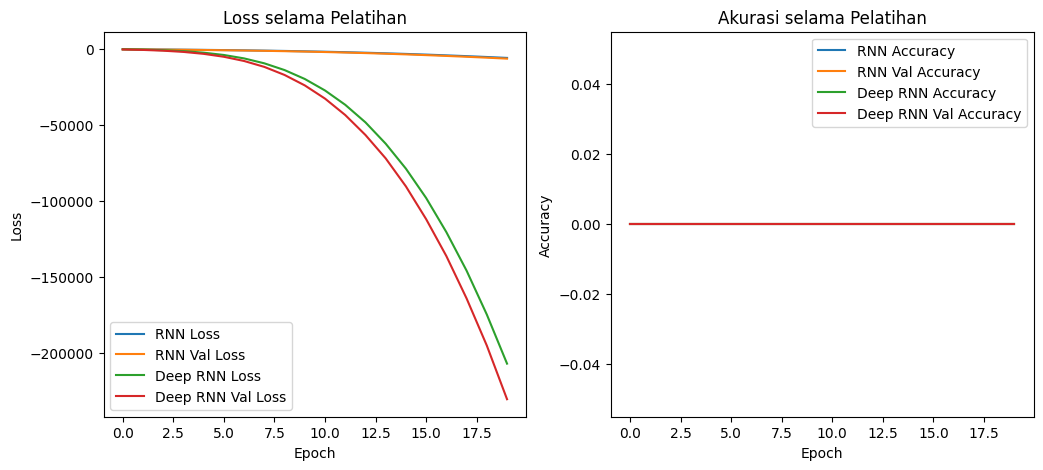

In [10]:
# Plot hasil RNN
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='RNN Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_deep_rnn.history['loss'], label='Deep RNN Loss')
plt.plot(history_deep_rnn.history['val_loss'], label='Deep RNN Val Loss')
plt.title('Loss selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='RNN Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(history_deep_rnn.history['accuracy'], label='Deep RNN Accuracy')
plt.plot(history_deep_rnn.history['val_accuracy'], label='Deep RNN Val Accuracy')
plt.title('Akurasi selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()